In [26]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data

In [27]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

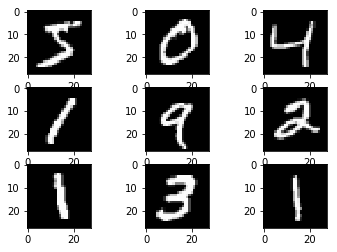

In [23]:
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    # show the plot
pyplot.show()

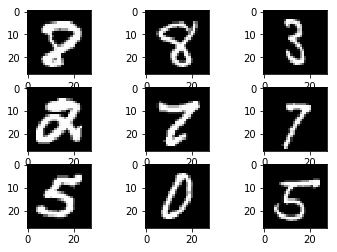

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

In [14]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [48]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [50]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile mode
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [51]:
#model = baseline_model()
model = larger_model()

In [52]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.3928 - acc: 0.8792 - val_loss: 0.0997 - val_acc: 0.9676
Epoch 2/10
 - 6s - loss: 0.0940 - acc: 0.9707 - val_loss: 0.0572 - val_acc: 0.9813
Epoch 3/10
 - 6s - loss: 0.0679 - acc: 0.9791 - val_loss: 0.0366 - val_acc: 0.9885
Epoch 4/10
 - 6s - loss: 0.0553 - acc: 0.9827 - val_loss: 0.0316 - val_acc: 0.9895
Epoch 5/10
 - 6s - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0304 - val_acc: 0.9909
Epoch 6/10
 - 6s - loss: 0.0430 - acc: 0.9864 - val_loss: 0.0281 - val_acc: 0.9910
Epoch 7/10
 - 6s - loss: 0.0374 - acc: 0.9883 - val_loss: 0.0276 - val_acc: 0.9909
Epoch 8/10
 - 6s - loss: 0.0342 - acc: 0.9892 - val_loss: 0.0233 - val_acc: 0.9921
Epoch 9/10
 - 6s - loss: 0.0321 - acc: 0.9901 - val_loss: 0.0209 - val_acc: 0.9937
Epoch 10/10
 - 6s - loss: 0.0274 - acc: 0.9914 - val_loss: 0.0209 - val_acc: 0.9932


In [53]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.68%


In [54]:
pred = model.predict(X_test)

In [55]:
pred[0]

array([9.8189878e-10, 8.2046538e-09, 1.0589383e-07, 5.2236751e-06,
       2.4893012e-09, 1.3157928e-07, 4.2505899e-12, 9.9999273e-01,
       1.0292041e-08, 1.7953886e-06], dtype=float32)

In [56]:
pred[0]*10000000000000000

array([9.81898785e+06, 8.20465385e+07, 1.05893832e+09, 5.22367509e+10,
       2.48930121e+07, 1.31579284e+09, 4.25058990e+04, 9.99992728e+15,
       1.02920410e+08, 1.79538858e+10])

In [57]:
numpy.argmax(pred[0])

7

In [58]:
a = pred[0]

In [59]:
a

array([9.8189878e-10, 8.2046538e-09, 1.0589383e-07, 5.2236751e-06,
       2.4893012e-09, 1.3157928e-07, 4.2505899e-12, 9.9999273e-01,
       1.0292041e-08, 1.7953886e-06], dtype=float32)

In [60]:
a * 255

array([2.5038420e-07, 2.0921868e-06, 2.7002927e-05, 1.3320372e-03,
       6.3477182e-07, 3.3552718e-05, 1.0839004e-09, 2.5499814e+02,
       2.6244704e-06, 4.5782409e-04], dtype=float32)

In [61]:
t = X_test[0]

In [62]:
t

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [63]:
X_test.shape

(10000, 1, 28, 28)

In [64]:
t = X_test[0]

In [65]:
t.shape

(1, 28, 28)

In [66]:
u = t.reshape(28,28)

In [67]:
u = u * 255

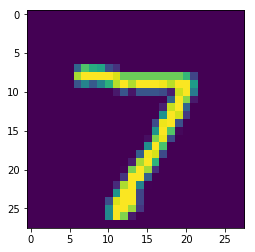

In [153]:
plt.imshow(u)
# show the plot
plt.show()

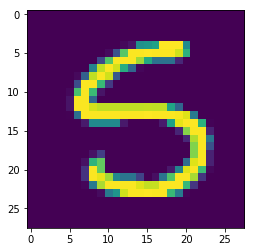

1810


In [154]:
i = numpy.random.randint(10000)
imagem = X_test[i].reshape(28,28)
plt.imshow(imagem)
# show the plot
plt.show()
print(i)

In [151]:
numpy.argmax(pred[i])

1

In [152]:
numpy.argmax(y_test[i])

1